<H1 style = "color : blue"> Click-through Rate Prediction </H1>

<H3 style = "color : brown"><b>Introduction:</b><br></H3>
Most of the websites we visit include ads. The online advertising industry is huge, and players such as Google, Amazon, and Facebook generate billions of dollars by targeting the correct audiences with relevant ads. Most of the decisions about ads are data-driven solutions such as the following: 

- How do you know which ad to use and who to target?
- Many companies advertise products in the same category, so how do you decide whose ad to display?
- Which ad should be placed on which part of the web page?
- Should a particular ad be pushed on a mobile device or remain on a desktop or laptop?

These decisions depend on numerous factors, including when the ad is placed, the site it is placed on, the characteristics of the people who will see the ad, the overall demographics, and more.
<br>

<H3 style = "color : brown"><b>Business Understanding: </b><br></H3>
You may have some experience of traveling to and from the airport. Have you ever used Uber or any other cab service for this travel? Did you at any time face the problem of cancellation by the driver or non-availability of cars?<br>
Well, if these are the problems faced by customers, these very issues also impact the business of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue.

<H3 style = "color : brown"><b>Problem Statement:</b><br></H3>
The objective is to predict whether the audience will click on an ad or not and thus help the marketing team answer ad placement-related questions.


In [1]:
# load a library we will use in this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading a data
df = pd.read_csv("data.csv")
print(df.head(5))

   click    C1  banner_pos   site_id site_domain site_category    app_id  \
0  False  1005           1  856e6d3f    58a89a43      f028772b  ecad2386   
1   True  1005           1  e151e245    7e091613      f028772b  ecad2386   
2  False  1005           0  e3c09f3a    d262cf1e      28905ebd  ecad2386   
3  False  1002           0  0da94452    248e439f      50e219e0  ecad2386   
4   True  1005           0  1fbe01fe    f3845767      28905ebd  ecad2386   

  app_domain app_category device_id  ...   C17 C18  C19     C20  C21  month  \
0   7801e8d9     07d7df22  a99f214a  ...  2528   0   39  100075  221     10   
1   7801e8d9     07d7df22  a99f214a  ...  1934   2   39      -1   16     10   
2   7801e8d9     07d7df22  a99f214a  ...  2552   3  167  100202   23     10   
3   7801e8d9     07d7df22  0fa578fd  ...  2478   3  167  100074   23     10   
4   7801e8d9     07d7df22  a99f214a  ...  1722   0   35      -1   79     10   

   dayofweek  day  hour  y  
0          1   28    14  0  
1         

<H3 style = "color : brown"><b>Data Attributes</b><br></H3>

There are 27 attributes associated with each a customer:

1. <b>click: </b>it is a Target Variable. 0/1 for non-click/click
2. <b>C1: </b>anonymized categorical variable
3. <b>banner_pos: </b>position of the ad/banner on the page
4. <b>site_id: </b>unique id of the site on which the ad is shown
5. <b>site_domain: </b>unique domain of the site on which the ad is shown
6. <b>site_category: </b>category of the site on which the ad is shown
7. <b>app_id: </b>app id of the site on which the ad is shown
8. <b>app_domain: </b>app category of the site on which the ad is shown
9. <b>app_category: </b>category id of the site on which the ad is shown
10. <b>device_id: </b>device id on which the add was shown
11. <b>device_ip: </b>ip address of the device on which the ad was shown
12. <b>device_model: </b>model type of the device on which the ad was shown
13. <b>device_type: </b>the device type on which the ad was shown
14. <b>device_conn_type: </b>the connection type of the device on which the ad was shown
15. <b>C14 - C21: </b>anonymized categorical variable
16. <b>hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.</b>

<b><u>Please note : </u></b>

- <b><i>C1 and C14 to C21 is Anonymized Confidential Information, which is non sharable sensitive information, can't be shared in public domain.</i></b>
- <b><i>other than Click(Target variable all other can be used as feature.</i></b>
- <b><i>this all information will be taken as input to build Classification Model</i></b>


In [3]:
# total Records of Dataset
df.shape

(99999, 27)

In [4]:
df.columns.values

array(['click', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19',
       'C20', 'C21', 'month', 'dayofweek', 'day', 'hour', 'y'],
      dtype=object)

In [5]:
# find detail about all column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [6]:
#to see all Null Values in dataset
df.isnull().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

In [7]:
df.y

0        0
1        1
2        0
3        0
4        1
        ..
99994    0
99995    0
99996    1
99997    1
99998    0
Name: y, Length: 99999, dtype: int64

In [8]:
df.click.value_counts(normalize=True)

False    0.830198
True     0.169802
Name: click, dtype: float64

<AxesSubplot:xlabel='banner_pos', ylabel='count'>

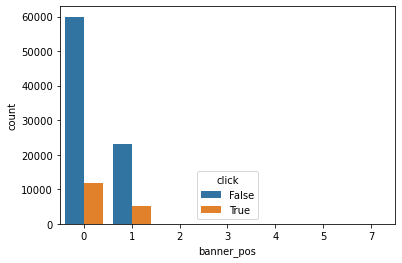

In [9]:
sns.countplot(x=df.banner_pos,hue = df.click )

In [10]:
df.shape[0]

99999

In [11]:
def EDA(parameter):
    #Impression
    Temp1 = 100 * (df.groupby(parameter).y.sum()/ df.groupby(parameter).y.count())
    
    #TotalLines
    Temp2 = 100 * (df.groupby(parameter).y.count() / df.shape[0])

    #EDA_banner_pos = 
    EDA_Table = pd.concat([Temp1,Temp2],axis = 1)


    EDA_Table.reset_index(inplace = True)
    column_names = ([parameter,'Impression','TotalLines'])
    EDA_Table.columns = column_names
    EDA_Table.set_index(parameter, inplace=True)
    EDA_Table
    
    plt.figure(figsize=(10, 10))
    
    sns.lineplot(data= EDA_Table, dashes=False,sort=False, lw=1)
    #sns.countplot(data= EDA_Table,x = parameter)
    #sns.barplot(data= EDA_Table)
    plt.xticks(rotation=90)
    plt.show
    EDA_Table


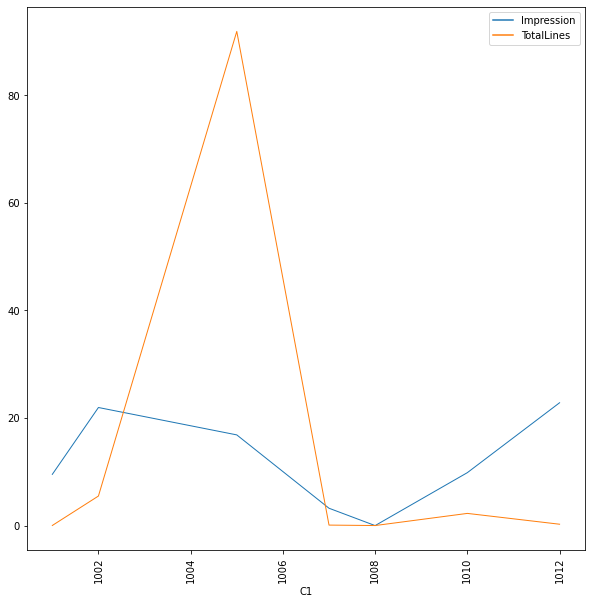

In [12]:
EDA('C1')

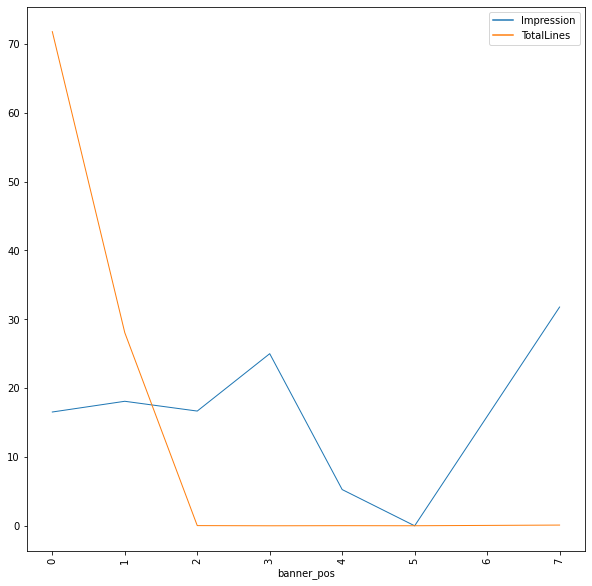

In [13]:
EDA('banner_pos')

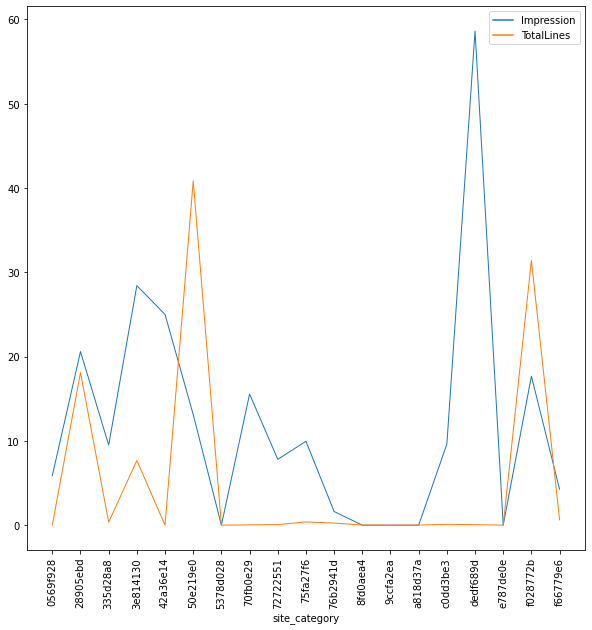

In [14]:
EDA('site_category')

In [15]:
df.nunique()

click                   2
C1                      7
banner_pos              7
site_id              1485
site_domain          1331
site_category          19
app_id               1354
app_domain             96
app_category           21
device_id           16801
device_ip           78013
device_model         3145
device_type             4
device_conn_type        4
C14                  1722
C15                     8
C16                     9
C17                   399
C18                     4
C19                    64
C20                   154
C21                    60
month                   1
dayofweek               7
day                    10
hour                   24
y                       2
dtype: int64

In [16]:
df.y.value_counts(normalize=True)

0    0.830198
1    0.169802
Name: y, dtype: float64

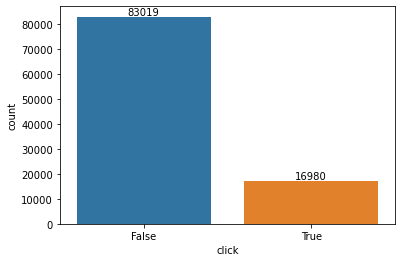

In [17]:
#Plotting Click 
plt.figure()
ax = sns.countplot(x='click',data = df)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

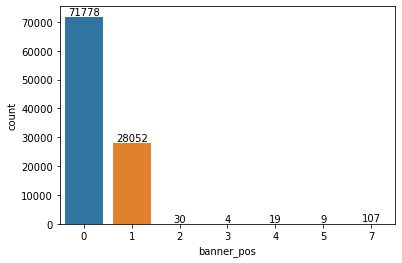

In [18]:
#Plotting banner_pos           
plt.figure()

ax = sns.countplot(x='banner_pos',data = df)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [19]:
df.site_id.value_counts()

85f751fd    36022
1fbe01fe    15862
e151e245     6597
d9750ee7     2376
5b08c53b     2305
            ...  
9e1b18be        1
27e10723        1
1661bb7f        1
1edf0277        1
bf991633        1
Name: site_id, Length: 1485, dtype: int64

In [20]:
df.site_domain.value_counts()

c4e18dd6    37362
f3845767    15862
7e091613     8280
7687a86e     3220
98572c79     2456
            ...  
babf5d87        1
a63817ea        1
8d450543        1
66cf2855        1
bde22369        1
Name: site_domain, Length: 1331, dtype: int64

In [21]:
df.app_id.value_counts()

ecad2386    63977
92f5800b     3865
e2fcccd2     2849
febd1138     1888
9c13b419     1867
            ...  
680d6760        1
a40fbb61        1
82a4d1ff        1
0890d0ba        1
a821a6b6        1
Name: app_id, Length: 1354, dtype: int64

In [22]:
df.site_id.value_counts()

85f751fd    36022
1fbe01fe    15862
e151e245     6597
d9750ee7     2376
5b08c53b     2305
            ...  
9e1b18be        1
27e10723        1
1661bb7f        1
1edf0277        1
bf991633        1
Name: site_id, Length: 1485, dtype: int64

In [23]:
df.device_id.value_counts()

a99f214a    82579
c357dbff       62
0f7c61dc       51
afeffc18       34
936e92fb       27
            ...  
125e25bb        1
244973fb        1
9ba711d4        1
60e04656        1
927c68c6        1
Name: device_id, Length: 16801, dtype: int64

In [24]:
df.site_category.value_counts()

50e219e0    40839
f028772b    31408
28905ebd    18107
3e814130     7668
f66779e6      634
75fa27f6      392
335d28a8      358
76b2941d      247
c0dd3be3      104
72722551       64
dedf689d       58
70fb0e29       45
0569f928       34
8fd0aea4       19
a818d37a       12
42a36e14        4
e787de0e        4
9ccfa2ea        1
5378d028        1
Name: site_category, dtype: int64

In [25]:
df.app_id.value_counts()

ecad2386    63977
92f5800b     3865
e2fcccd2     2849
febd1138     1888
9c13b419     1867
            ...  
680d6760        1
a40fbb61        1
82a4d1ff        1
0890d0ba        1
a821a6b6        1
Name: app_id, Length: 1354, dtype: int64

In [26]:
df.app_domain.value_counts()

7801e8d9    67464
2347f47a    12893
ae637522     4701
5c5a694b     2850
82e27996     1889
            ...  
ead20d3d        1
2619a4f7        1
cb36afb8        1
ae36b8ab        1
63f57be0        1
Name: app_domain, Length: 96, dtype: int64

In [27]:
df.app_category.value_counts()

07d7df22    64769
0f2161f8    23644
cef3e649     4300
8ded1f7a     3519
f95efa07     2868
d1327cf5      315
dc97ec06      140
09481d60      129
75d80bbe       81
4ce2e9fc       67
fc6fa53d       58
a3c42688       32
879c24eb       22
4681bb9d       21
0f9a328c       13
a86a3e89        6
2281a340        6
8df2e842        5
7113d72a        2
a7fd01ec        1
79f0b860        1
Name: app_category, dtype: int64

In [28]:
df.device_model.value_counts()

8a4875bd    6041
1f0bc64f    3401
d787e91b    3373
76dc4769    1862
be6db1d7    1805
            ... 
1dbc394f       1
913bd042       1
1d222263       1
8932b0c5       1
c84e186e       1
Name: device_model, Length: 3145, dtype: int64

In [29]:
df.device_id.value_counts()

a99f214a    82579
c357dbff       62
0f7c61dc       51
afeffc18       34
936e92fb       27
            ...  
125e25bb        1
244973fb        1
9ba711d4        1
60e04656        1
927c68c6        1
Name: device_id, Length: 16801, dtype: int64

In [30]:
df.device_type.value_counts()

1    92239
0     5494
4     1931
5      335
Name: device_type, dtype: int64

In [31]:
df.device_conn_type.value_counts()

0    86413
2     8043
3     5428
5      115
Name: device_conn_type, dtype: int64

In [32]:
df.C14.value_counts()

4687     2306
21611    2192
21189    1908
21191    1902
19772    1827
         ... 
23228       1
23688       1
18859       1
19742       1
16153       1
Name: C14, Length: 1722, dtype: int64

In [33]:
df.C1.value_counts()

1005    91862
1002     5494
1010     2266
1012      254
1007       93
1001       21
1008        9
Name: C1, dtype: int64

In [34]:
df.C15.value_counts()

320     93136
300      5872
216       776
728       186
120        10
480         9
1024        7
768         3
Name: C15, dtype: int64

In [35]:
df.C16.value_counts()

50      94209
250      4532
36        776
480       267
90        186
20         10
320         9
768         7
1024        3
Name: C16, dtype: int64

In [36]:
df.C17.value_counts()

1722    10991
2424     3810
2227     3662
1800     2953
423      2306
        ...  
2525        1
2483        1
2582        1
2592        1
2541        1
Name: C17, Length: 399, dtype: int64

In [37]:
df.C18.value_counts()

0    41659
3    34043
2    17563
1     6734
Name: C18, dtype: int64

In [38]:
df.C19.value_counts()

35      29935
39      21905
167      7832
161      3956
47       3582
        ...  
939        12
1583        7
683         3
45          3
1195        1
Name: C19, Length: 64, dtype: int64

In [39]:
df.C20.value_counts()

-1         46767
 100084     6071
 100148     4405
 100111     4143
 100077     3915
           ...  
 100109        2
 100043        2
 100137        1
 100175        1
 100010        1
Name: C20, Length: 154, dtype: int64

In [40]:
df.C21.value_counts()

23     22096
221    12352
79     11227
48      5381
71      5268
61      5056
157     4540
32      4383
33      3743
52      2984
42      2549
51      2132
15      1890
212     1640
43      1397
229     1031
117     1016
13       948
16       880
68       850
156      848
159      731
95       700
46       579
246      486
69       463
91       432
17       407
111      386
76       357
171      312
90       307
70       306
110      271
204      241
101      214
112      198
253      183
82       182
100      158
182      131
178      124
108      124
35       105
94        68
251       56
116       35
194       31
20        29
102       27
104       25
93        24
126       24
163       17
195       16
1         12
255       10
177        8
219        7
85         2
Name: C21, dtype: int64

In [41]:
df.month.value_counts()

10    99999
Name: month, dtype: int64

In [42]:
df.dayofweek.value_counts()

1    23269
2    22834
3    20014
6     9326
4     8264
5     8258
0     8034
Name: dayofweek, dtype: int64

In [43]:
df.day.value_counts()

22    13092
28    13056
30    10495
21    10213
29     9742
23     9519
26     9326
24     8264
25     8258
27     8034
Name: day, dtype: int64

In [44]:
df.hour.value_counts()

13    5905
9     5659
12    5638
14    5393
10    5345
8     5251
11    5136
17    5101
16    5077
15    5019
5     4941
4     4664
7     4488
18    4389
6     4365
3     3531
19    3301
2     2950
20    2702
21    2435
1     2375
22    2284
23    2045
0     2005
Name: hour, dtype: int64

In [45]:
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


In [46]:
df.site_id.value_counts()

85f751fd    36022
1fbe01fe    15862
e151e245     6597
d9750ee7     2376
5b08c53b     2305
            ...  
9e1b18be        1
27e10723        1
1661bb7f        1
1edf0277        1
bf991633        1
Name: site_id, Length: 1485, dtype: int64

In [47]:
df.app_id.value_counts()

ecad2386    63977
92f5800b     3865
e2fcccd2     2849
febd1138     1888
9c13b419     1867
            ...  
680d6760        1
a40fbb61        1
82a4d1ff        1
0890d0ba        1
a821a6b6        1
Name: app_id, Length: 1354, dtype: int64

In [48]:
df.device_id.value_counts()

a99f214a    82579
c357dbff       62
0f7c61dc       51
afeffc18       34
936e92fb       27
            ...  
125e25bb        1
244973fb        1
9ba711d4        1
60e04656        1
927c68c6        1
Name: device_id, Length: 16801, dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [50]:
df.shape[0]

99999

In [51]:
df2 = pd.get_dummies(df.loc[:, ~df.columns.isin(['click','y','device_id','device_ip','site_id','month'])])

In [52]:
df2.head()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,...,device_model_ff607a1a,device_model_ff717dd1,device_model_ff91ea03,device_model_ff963f16,device_model_ffb16766,device_model_ffc70ef9,device_model_ffcd1497,device_model_ffceddb3,device_model_ffe3ae81,device_model_ffe69079
0,1005,1,1,0,22683,320,50,2528,0,39,...,0,0,0,0,0,0,0,0,0,0
1,1005,1,1,0,17037,320,50,1934,2,39,...,0,0,0,0,0,0,0,0,0,0
2,1005,0,1,0,22155,320,50,2552,3,167,...,0,0,0,0,0,0,0,0,0,0
3,1002,0,0,0,21591,320,50,2478,3,167,...,0,0,0,0,0,0,0,0,0,0
4,1005,0,1,0,15708,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0


In [53]:
drop_list = df.loc[:, ~df.columns.isin(['click','y','device_id','site_id','device_ip','month'])].columns


In [54]:
df2 = df2.iloc[:,len(drop_list):]

In [55]:
df2.head()

,site_domain_01f9b380,site_domain_021dbcbe,site_domain_022ab9c6,site_domain_026faf38,site_domain_0316bf4f,site_domain_0322ae72,site_domain_03cc62db,site_domain_04001ead,site_domain_04205356,site_domain_0445c666,...,device_model_ff607a1a,device_model_ff717dd1,device_model_ff91ea03,device_model_ff963f16,device_model_ffb16766,device_model_ffc70ef9,device_model_ffcd1497,device_model_ffceddb3,device_model_ffe3ae81,device_model_ffe69079
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Determine what features to include in the model. Remove the features you won’t include from the dataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 5960 entries, site_domain_01f9b380 to device_model_ffe69079
dtypes: uint8(5960)
memory usage: 568.4 MB


In [57]:
df2.columns

Index(['site_domain_01f9b380', 'site_domain_021dbcbe', 'site_domain_022ab9c6',
       'site_domain_026faf38', 'site_domain_0316bf4f', 'site_domain_0322ae72',
       'site_domain_03cc62db', 'site_domain_04001ead', 'site_domain_04205356',
       'site_domain_0445c666',
       ...
       'device_model_ff607a1a', 'device_model_ff717dd1',
       'device_model_ff91ea03', 'device_model_ff963f16',
       'device_model_ffb16766', 'device_model_ffc70ef9',
       'device_model_ffcd1497', 'device_model_ffceddb3',
       'device_model_ffe3ae81', 'device_model_ffe69079'],
      dtype='object', length=5960)

In [58]:
X = df2.loc[:]
Y = df.loc[:,['y']]

In [59]:
# import Split Function
from sklearn.model_selection import train_test_split

X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,train_size=0.7,random_state=0)#,stratify=Y)
print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)
print(Y_Test.shape)


(69999, 5960)
(69999, 1)
(30000, 5960)
(30000, 1)


In [60]:
# Fit your training data to a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
# declare the logistic model
start_time_LR = time.time()
model = LogisticRegression()

# train the model on the data
model.fit(X_Train, Y_Train)

LogisticRegression()

In [61]:
model.coef_

array([[ 0.        ,  0.50254344, -0.35392837, ...,  0.39892413,
         0.24949409, -0.72315284]])

In [62]:
Y_Train_Pred =  model.predict(X_Train)

In [63]:
from sklearn import metrics
print(metrics.accuracy_score(Y_Train,Y_Train_Pred))


0.8351833597622823


In [64]:
from sklearn.dummy import DummyClassifier
dummy_clf  = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_Train,Y_Train)
dummy_pred =  dummy_clf.predict(X_Train)
print(metrics.accuracy_score(Y_Train,dummy_pred))

0.8305690081286875


In [65]:
model.coef_.shape


(1, 5960)

In [66]:
# Use the testing data to make predictions and determine the accuracy of your predictions.
Y_Pred = model.predict(X_Test)

from sklearn import metrics
print(metrics.accuracy_score(Y_Test, Y_Pred))



0.8311666666666667


In [67]:
# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_Test, Y_Pred)
print(cnf_matrix)


[[24638   242]
 [ 4823   297]]


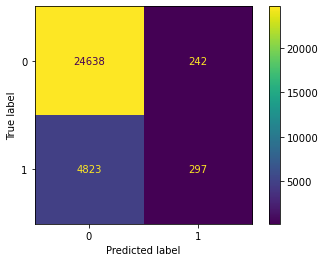

In [68]:
metrics.plot_confusion_matrix(model, X_Test, Y_Test)
plt.show()

In [69]:
# Calculating a base line for comparing the model. 
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_Train, Y_Train)

DummyClassifier(strategy='most_frequent')

[[24880     0]
 [ 5120     0]]


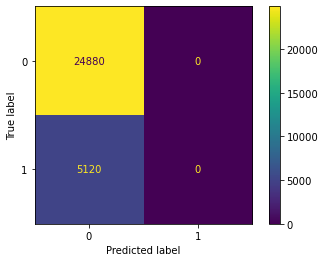

In [70]:
Y_Pred = dummy_clf.predict(X_Test)

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_Test, Y_Pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(dummy_clf, X_Test, Y_Test)
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_Test, model.predict_proba(X_Test)[:, 1])
#ROC - 

0.7168488942235229

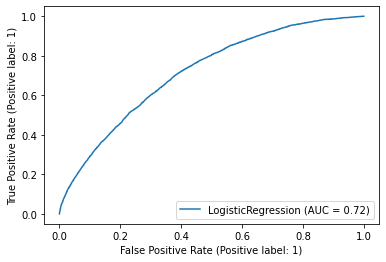

In [72]:
import matplotlib.pyplot as plt
metrics.plot_roc_curve(model, X_Test, Y_Test) 
plt.show()

In [73]:
print("--- %s seconds ---" % (time.time() - start_time_LR))

--- 74.9349455833435 seconds ---


<H2 style = "color : blue"><b>Decision Tree</b><br></H2>

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [75]:
X_Train.shape

(69999, 5960)

In [76]:
X_Test.shape

(30000, 5960)

In [77]:
X.shape

(99999, 5960)

In [78]:
dt_basic = DecisionTreeClassifier()

In [79]:
dt_basic

DecisionTreeClassifier()

In [80]:
dt_basic.fit(X_Train,Y_Train)

DecisionTreeClassifier()

In [81]:
Y_Pred_dt = dt_basic.predict(X_Test)

In [82]:
Y_Pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
accuracy = metrics.accuracy_score(Y_Test, Y_Pred_dt)
accuracy

0.8167

In [84]:
cnf_matrix = metrics.confusion_matrix(Y_Test, Y_Pred)
print(cnf_matrix)


[[24880     0]
 [ 5120     0]]


In [85]:
print(classification_report(Y_Test,Y_Pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     24880
           1       0.36      0.09      0.15      5120

    accuracy                           0.82     30000
   macro avg       0.60      0.53      0.52     30000
weighted avg       0.76      0.82      0.77     30000



<H3>Visualize the Tree</H3>



ModuleNotFoundError: No module named 'sklearn.externals.six'

<H3>Hyperparameter Tuning</H3>



<H4>Max Dept
</H4>



In [90]:
parameters = {'max_depth': range(1,10)}

In [92]:
parameters

{'max_depth': range(1, 10)}

In [93]:
n_folds = 5

In [94]:
dtree2 = DecisionTreeClassifier(criterion='gini',random_state=0)

In [95]:
dtree2


DecisionTreeClassifier(random_state=0)

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [98]:
tree = GridSearchCV(dtree2,parameters,cv=n_folds,scoring="accuracy",return_train_score = True)
tree

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [99]:
tree.fit(X_Train,Y_Train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [101]:
scores = tree.cv_results_

In [102]:
scores

{'mean_fit_time': array([ 8.31887259, 10.88235183, 13.60503478, 15.92347183, 17.68101516,
        19.8271307 , 21.70394244, 23.97515707, 25.83076806]),
 'std_fit_time': array([0.08025821, 0.18365698, 0.28565667, 0.28856383, 0.59279034,
        0.79355223, 0.93100779, 1.17371249, 1.22855615]),
 'mean_score_time': array([0.47680578, 0.46480975, 0.47281022, 0.46760869, 0.47240729,
        0.46640205, 0.44920239, 0.47120261, 0.48880424]),
 'std_score_time': array([0.03184792, 0.01349644, 0.01600356, 0.02178612, 0.03893488,
        0.02514363, 0.01330368, 0.01748753, 0.02110629]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9}],
 's

In [103]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.318873,0.080258,0.476806,0.031848,1,{'max_depth': 1},0.830571,0.830571,0.830571,0.830571,...,0.830569,0.000005,9,0.830568,0.830568,0.830568,0.830568,0.830571,0.830569,0.000001
1,10.882352,0.183657,0.464810,0.013496,2,{'max_depth': 2},0.830571,0.830571,0.830571,0.830571,...,0.830583,0.000024,8,0.830568,0.830568,0.830568,0.830568,0.830643,0.830583,0.000030
2,13.605035,0.285657,0.472810,0.016004,3,{'max_depth': 3},0.832571,0.831286,0.830857,0.831643,...,0.831669,0.000587,1,0.831533,0.831765,0.831926,0.831765,0.831750,0.831748,0.000125
3,15.923472,0.288564,0.467609,0.021786,4,{'max_depth': 4},0.832643,0.831286,0.830857,0.831500,...,0.831655,0.000614,2,0.831568,0.831818,0.832122,0.831979,0.831804,0.831858,0.000186
4,17.681015,0.592790,0.472407,0.038935,5,{'max_depth': 5},0.832500,0.831357,0.830786,0.831286,...,0.831569,0.000588,3,0.831693,0.831890,0.832318,0.832193,0.831875,0.831994,0.000228


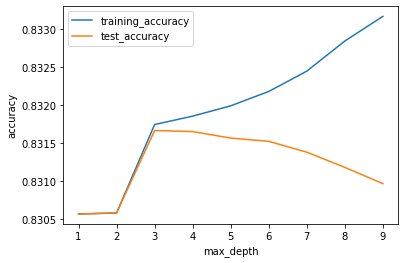

In [104]:
plt.figure
plt.plot(scores["param_max_depth"].data,scores["mean_train_score"],label="training_accuracy")
plt.plot(scores["param_max_depth"].data, scores["mean_test_score"], label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()